In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning

In [3]:
setup_df        =   SetupDataFrame()
analyze_df      =   AnalyzeDataFrame()
visualize_df    =   VisualizeDataFrame()
eval_model      =   EvalModel()
hp_tuning_model =   HyperParameterTuning()

In [4]:
df = setup_df.setup_ml("13-car_evaluation.csv")

In [5]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(1727, 7)
***************************************** TYPES ******************************************
vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object
****************************************** HEAD ******************************************
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
****************************************** TAIL ******************************************
     vhigh vhigh.1      2   2.1 small   low  unacc
1722   low     low  5more  more   med   med   good
1723   low     low  5more  more   med  high  vgood
1724   low     low  5more  more   big   low  unacc
1725   low     low

In [6]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
************************************** DF DESCRIBE ***************************************
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top  

In [7]:
# converting column names
col_names = ["BUYING", "MAINTANENCE", "DOORS", "PERSONS", "LUGGAGE_BOOT", "SAFETY", "CLASS"]
df.columns = col_names

In [8]:
cat_cols, num_cols, cat_but_car = analyze_df.grab_col_names(df)

Observations: 1727
Variables: 7
cat_cols: 7
num_cols: 0
cat_but_car: 0
num_but_cat: 0

Categorical Cols: ['BUYING', 'MAINTANENCE', 'DOORS', 'PERSONS', 'LUGGAGE_BOOT', 'SAFETY', 'CLASS']

Numerical Cols: []

Categorical but cardinal Cols: []


In [9]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['BUYING', 'MAINTANENCE', 'DOORS', 'PERSONS', 'LUGGAGE_BOOT', 'SAFETY',
       'CLASS'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BUYING        1727 non-null   object
 1   MAINTANENCE   1727 non-null   object
 2   DOORS         1727 non-null   object
 3   PERSONS       1727 non-null   object
 4   LUGGAGE_BOOT  1727 non-null   object
 5   SAFETY        1727 non-null   object
 6   CLASS         1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
************************************** DF DESCRIBE ***************************************
       BUYING MAINTANENCE DOORS PERSONS LUGGAGE_BOOT SAFETY  CLASS
count    1727

In [10]:
df["DOORS"] = df["DOORS"].replace("5more", "5")
df["PERSONS"] = df["PERSONS"].replace("more", "5") 

In [11]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['BUYING', 'MAINTANENCE', 'DOORS', 'PERSONS', 'LUGGAGE_BOOT', 'SAFETY',
       'CLASS'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BUYING        1727 non-null   object
 1   MAINTANENCE   1727 non-null   object
 2   DOORS         1727 non-null   object
 3   PERSONS       1727 non-null   object
 4   LUGGAGE_BOOT  1727 non-null   object
 5   SAFETY        1727 non-null   object
 6   CLASS         1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
************************************** DF DESCRIBE ***************************************
       BUYING MAINTANENCE DOORS PERSONS LUGGAGE_BOOT SAFETY  CLASS
count    1727

In [12]:
df["DOORS"] = df["DOORS"].astype("int")
df["PERSONS"] = df["PERSONS"].astype("int")

In [13]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(1727, 7)
***************************************** TYPES ******************************************
BUYING          object
MAINTANENCE     object
DOORS            int64
PERSONS          int64
LUGGAGE_BOOT    object
SAFETY          object
CLASS           object
dtype: object
****************************************** HEAD ******************************************
  BUYING MAINTANENCE  DOORS  PERSONS LUGGAGE_BOOT SAFETY  CLASS
0  vhigh       vhigh      2        2        small    med  unacc
1  vhigh       vhigh      2        2        small   high  unacc
2  vhigh       vhigh      2        2          med    low  unacc
3  vhigh       vhigh      2        2          med    med  unacc
4  vhigh       vhigh      2        2          med   high  unacc
****************************************** TAIL ******************************************
     BUYING MAINTANENCE  DOORS  PERSONS LUGGAGE_BOOT SAFETY  CLASS


In [14]:
X = df.drop("CLASS", axis=1)
y = df["CLASS"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 1727
Variables: 7
cat_cols: 7
num_cols: 0
cat_but_car: 0
num_but_cat: 2

Categorical Cols: ['BUYING', 'MAINTANENCE', 'LUGGAGE_BOOT', 'SAFETY', 'CLASS', 'DOORS', 'PERSONS']

Numerical Cols: []

Categorical but cardinal Cols: []


In [18]:
num_cols = ["DOORS", "PERSONS"]

In [19]:
cat_cols.remove("PERSONS")
cat_cols.remove("DOORS")
cat_cols.remove("CLASS")

In [20]:
cat_cols

['BUYING', 'MAINTANENCE', 'LUGGAGE_BOOT', 'SAFETY']

In [21]:
encoder = OrdinalEncoder(categories=[
    ['low', 'med', 'high', 'vhigh'],
    ['low', 'med', 'high', 'vhigh'],
    ['small', 'med', 'big'],
    ['low', 'med', 'high']
])

In [22]:
preprocessor = ColumnTransformer(
    [("transformers_idont_know_what_should_i_write_here", encoder, cat_cols)], remainder="passthrough"
)

In [23]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [24]:
X_train_transformed

array([[3., 2., 0., 0., 2., 2.],
       [1., 3., 0., 1., 3., 4.],
       [0., 0., 2., 2., 5., 2.],
       ...,
       [2., 0., 2., 0., 5., 5.],
       [0., 2., 0., 2., 4., 2.],
       [1., 1., 0., 2., 3., 5.]], shape=(1381, 6))

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(X_test_transformed)

              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346

[[ 71   2   2   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]


(0.9653179190751445,
 0.9653179190751445,
 0.9661949375907213,
 0.9656014038105836,
 0.9659204785386744)

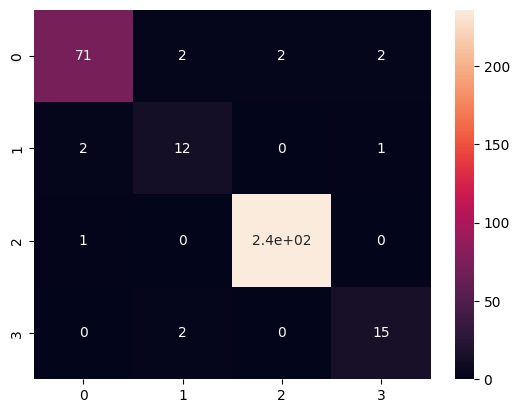

In [27]:
eval_model.eval_class_model(X_test_transformed, y_test, model, visualize=True)

In [28]:
eval_model.base_models(X_train_transformed, y_train)

Base Models...
roc_auc_ovr: 0.9609 (LR) 
roc_auc_ovr: 0.9873 (KNN) 
roc_auc_ovr: 0.9938 (SVC) 
roc_auc_ovr: 0.9602 (CART) 
roc_auc_ovr: 0.9983 (RF) 
roc_auc_ovr: 0.9278 (Adaboost) 
roc_auc_ovr: 0.9994 (GBM) 


In [29]:
eval_model.base_models(X_train_transformed, y_train, scoring="accuracy")

Base Models...
accuracy: 0.8414 (LR) 
accuracy: 0.9471 (KNN) 
accuracy: 0.924 (SVC) 
accuracy: 0.9725 (CART) 
accuracy: 0.9703 (RF) 
accuracy: 0.8436 (Adaboost) 
accuracy: 0.9826 (GBM) 


In [30]:
best_models = hp_tuning_model.hyperparameter_optimization(X_train_transformed, y_train)

Hyperparameter Optimization....
########## KNN ##########
roc_auc_ovr (Before): 0.9873
roc_auc_ovr (After): 0.9896
 KNN best params: {'n_neighbors': 9}

########## CART ##########
roc_auc_ovr (Before): 0.9546
roc_auc_ovr (After): 0.9847
 CART best params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_split': 8, 'splitter': 'random'}

########## RF ##########
roc_auc_ovr (Before): 0.9981
roc_auc_ovr (After): 0.9951
 RF best params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 300}

########## XGBoost ##########
roc_auc_ovr (Before): 0.9996


/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:52:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:52:23] WARNING: /Users/runn

roc_auc_ovr (After): 0.9995
 XGBoost best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

########## LightGBM ##########
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 6
[LightGBM] [Info] Start training from score -1.506254
[LightGBM] [Info] Start training from score -3.240855
[LightGBM] [Info] Start training from score -0.350483
[LightGBM] [Info] Start training from score -3.358638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.198798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 921, numb

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 6
[LightGBM] [Info] Start training from score -1.506254
[LightGBM] [Info] Start training from score -3.240855
[LightGBM] [Info] Start training from score -0.350483
[LightGBM] [Info] Start training from score -3.358638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Info] Start training from score -1.502450
[LightGBM] [Info] Start training from score -3.241941
[LightGBM] [Info] Start training from score -0.351569
[LightGBM] [Info] Start traini

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 6
[LightGBM] [Info] Start training from score -1.50245

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 6
[LightGBM] [Info] Start training from score -1.502450
[LightGBM] [Info] Start training from score -3.241941
[LightGBM] [Info] Start training from score -0.351569
[LightGBM] [Info] Start training from score -3.359724
[LightGBM] [Warning] No further splits with positive gain, be

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 6
[LightGBM] [Info] Start training from score -1.502450
[LightGBM] [Info] Start training from score -3.241941
[LightGBM] [Info] Start training from score -0.351569
[LightGBM] [Info] Start training from score -3.359724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 6
[LightGBM] [Info] Start training from score -1.506254
[LightGBM] [Info] Start training from score -3.240855
[LightGBM] [Info] Start training from score -0.350483
[LightGBM] [Info] Start training from score -3.358638
[LightGBM] [Warning] No further splits with positi

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 6
[LightGBM] [Info] Start training from sco

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1381, number of used features: 6
[LightGBM] [Info] Start training from score -1.503715
[LightGBM] [Info] Start training from score -3.241579
[LightGBM] [Info] Start training from score -0.351207
[LightGBM] [Info] Start training from score -3.359362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [31]:
clf = hp_tuning_model.voting_classifier(best_models, X_train_transformed, y_train)

Voting Classifier...


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1381, number of used features: 6
[LightGBM] [Info] Start training from score -1.503715
[LightGBM] [Info] Start training from score -3.241579
[LightGBM] [Info] Start training from score -0.351207
[LightGBM] [Info] Start training from score -3.359362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [32]:
best_models

{'KNN': KNeighborsClassifier(n_neighbors=9),
 'CART': DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=8,
                        splitter='random'),
 'RF': RandomForestClassifier(max_features=5, min_samples_split=15, n_estimators=300),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               device=None, early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
